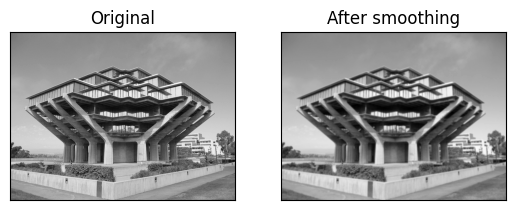

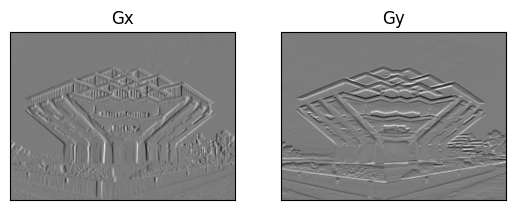

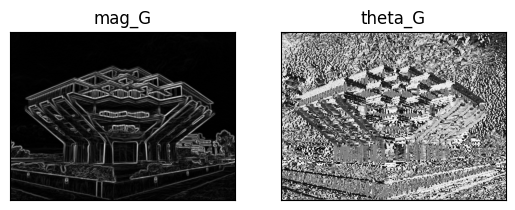

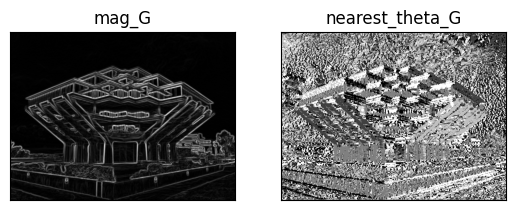

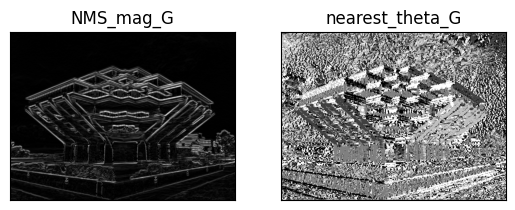

In [ ]:
# Problem 1. Canny Edge Detection
# write a function that performs Canny Edge Detection
# two inputs: a grayscale image, and a threshold te
# returns the edge image
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/HW3_geisel.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32)
# 1. Smoothing:
kernel = np.array([
    [2, 4, 5, 4, 2],
    [4, 9, 12, 9, 4],
    [5, 12, 15, 12, 5],
    [4, 9, 12, 9, 4],
    [2, 4, 5, 4, 2]])*(1/159)
#kernel = np.ones((5,5),np.float32)/25
smooth_image = cv2.filter2D(image,-1,kernel)
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smooth_image, cmap='gray'),plt.title('After smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

# 2. Finding Gradients
kx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
ky = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])

Gx = cv2.filter2D(smooth_image,-1,kx)
Gy = cv2.filter2D(smooth_image,-1,ky)
plt.subplot(121), plt.imshow(Gx, cmap='gray'), plt.title('Gx')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(Gy, cmap='gray'), plt.title('Gy')
plt.xticks([]), plt.yticks([])
plt.show()

mag_G = np.sqrt(Gx**2 + Gy**2)
# try mag_G = |Gx| + |Gy|
Gx_new = Gx + 1e-6
theta_G = np.arctan(Gy/Gx_new)
plt.subplot(121), plt.imshow(mag_G, cmap='gray'), plt.title('mag_G')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(theta_G, cmap='gray'), plt.title('theta_G')
plt.xticks([]), plt.yticks([])
plt.show()

# 3. Non-maximum Suppression (NMS):
nearest_theta_G = np.round(theta_G/(np.pi/4))*(np.pi/4)
plt.subplot(121), plt.imshow(mag_G, cmap='gray'), plt.title('mag_G')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(nearest_theta_G, cmap='gray'), plt.title('nearest_theta_G')
plt.xticks([]), plt.yticks([])
plt.show()

# padded_mag_G = np.pad(mag_G, [(1, 1), (1, 1)], mode='constant', constant_values=0)
for i in range(1,theta_G.shape[0]-1):
  for j in range(1,theta_G.shape[1]-1):
    if nearest_theta_G[i,j] == 0 or nearest_theta_G[i,j] == -0:
      if mag_G[i,j]<max(mag_G[i-1,j],mag_G[i+1,j]):
        mag_G[i,j] = 0
    elif nearest_theta_G[i,j] == np.pi/4:
      # print(nearest_theta_G[i,j])
      if mag_G[i,j]<max(mag_G[i-1,j+1],mag_G[i+1,j-1]):
        mag_G[i,j] = 0
    elif nearest_theta_G[i,j] == np.pi/2 or nearest_theta_G[i,j] == -np.pi/2:
      if mag_G[i,j]<max(mag_G[i,j-1],mag_G[i,j+1]):
        mag_G[i,j] = 0
    elif nearest_theta_G[i,j] == -np.pi/4:
      if mag_G[i,j]<max(mag_G[i-1,j-1],mag_G[i+1,j+1]):
        mag_G[i,j] = 0

plt.subplot(121), plt.imshow(mag_G, cmap='gray'), plt.title('NMS_mag_G')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(nearest_theta_G, cmap='gray'), plt.title('nearest_theta_G')
plt.xticks([]), plt.yticks([])
plt.show()

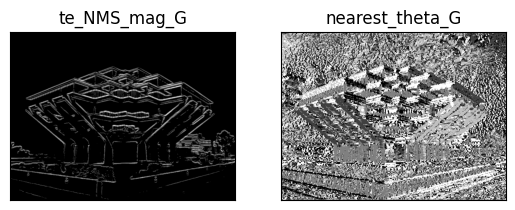

In [ ]:
# 4. Thresholding
te = 100
te_mag_G = mag_G.copy()
for i in range(mag_G.shape[0]):
  for j in range(mag_G.shape[1]):
    if mag_G[i][j]<= te:
      te_mag_G[i][j] = 0

plt.subplot(121), plt.imshow(te_mag_G, cmap='gray'), plt.title('te_NMS_mag_G')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(nearest_theta_G, cmap='gray'), plt.title('nearest_theta_G')
plt.xticks([]), plt.yticks([])
plt.show()

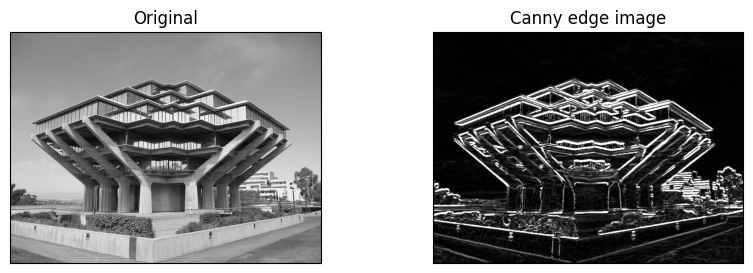

In [ ]:
import cv2
import numpy as np
import math

def canny_edge_detection(image, threshold):
  # 1. Smoothing:
  kernel = np.array([
      [2, 4, 5, 4, 2],
      [4, 9, 12, 9, 4],
      [5, 12, 15, 12, 5],
      [4, 9, 12, 9, 4],
      [2, 4, 5, 4, 2]])*(1/159)
  smooth_image = cv2.filter2D(image,-1,kernel)

  # 2. Finding Gradients
  kx = np.array([
      [-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]])
  ky = np.array([
      [-1, -2, -1],
      [0, 0, 0],
      [1, 2, 1]])

  Gx = cv2.filter2D(smooth_image,-1,kx)
  Gy = cv2.filter2D(smooth_image,-1,ky)
  mag_G = np.sqrt(Gx**2 + Gy**2)
  Gx_new = Gx + 1e-6
  theta_G = np.arctan(Gy/Gx_new)

  # 3. Non-maximum Suppression (NMS):
  nearest_theta_G = np.round(theta_G/(np.pi/4))*(np.pi/4)
  for i in range(1,theta_G.shape[0]-1):
    for j in range(1,theta_G.shape[1]-1):
      if nearest_theta_G[i,j] == 0 or nearest_theta_G[i,j] == -0:
        if mag_G[i,j]<max(mag_G[i-1,j],mag_G[i+1,j]):
          mag_G[i,j] = 0
      elif nearest_theta_G[i,j] == np.pi/4:
        # print(nearest_theta_G[i,j])
        if mag_G[i,j]<max(mag_G[i-1,j+1],mag_G[i+1,j-1]):
          mag_G[i,j] = 0
      elif nearest_theta_G[i,j] == np.pi/2 or nearest_theta_G[i,j] == -np.pi/2:
        if mag_G[i,j]<max(mag_G[i,j-1],mag_G[i,j+1]):
          mag_G[i,j] = 0
      elif nearest_theta_G[i,j] == -np.pi/4:
        if mag_G[i,j]<max(mag_G[i-1,j-1],mag_G[i+1,j+1]):
          mag_G[i,j] = 0
  # 4. Thresholding
  mag_G[mag_G > threshold] = 255
  return mag_G

image = cv2.imread('/content/HW3_geisel.jpg', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)
threshold = 150
edges = canny_edge_detection(image, threshold)

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny edge image')
plt.xticks([]), plt.yticks([])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

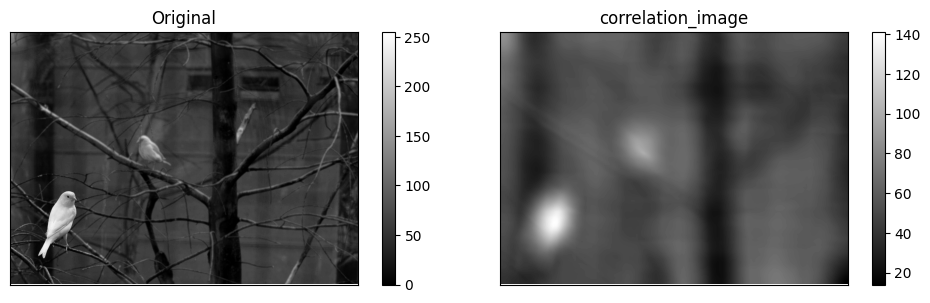

In [ ]:
# Problem 2. Detecting Objects with Template Matching
# Cross-Correlation Filter
birds1 = cv2.imread('/content/birds1.jpeg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/template.jpeg', cv2.IMREAD_GRAYSCALE)
norm_template = template*(1/np.sum(template))
correlation_birds1 = cv2.filter2D(birds1,-1,norm_template)
# correlation_birds1 = cv2.filter2D(birds1,-1,template)

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(birds1, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.subplot(122), plt.imshow(correlation_birds1, cmap='gray'), plt.title('correlation_image')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

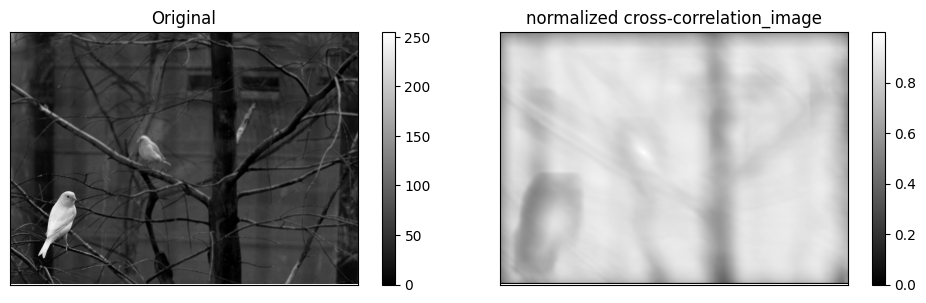

In [ ]:
# Normalized Cross-Correlation Filter
birds1 = cv2.imread('/content/birds1.jpeg', cv2.IMREAD_GRAYSCALE)
birds1 = birds1.astype(np.float32)
normalized_birds1 = birds1 / 255.0
template = cv2.imread('/content/template.jpeg', cv2.IMREAD_GRAYSCALE)
template = template.astype(np.float32)
normalized_template = template / 255.0
# norm_template = template*(1/np.sum(template))
correlation_birds1 = cv2.filter2D(normalized_birds1,-1,normalized_template)
norm_cross_corr1 = np.zeros_like(correlation_birds1)
template_height, template_width = normalized_template.shape
pad = int(np.round(template_height/2))-2
# Pad the birds1 image on both sides
padded_norm_birds1 = np.pad(normalized_birds1, ((pad, pad), (pad, pad)), mode='constant')
# padded_norm_birds1 = np.pad(normalized_birds1, ((0, template_height - 1), (0, template_width - 1)), mode='constant')
for i in range(padded_norm_birds1.shape[0] - template_height + 1):
    for j in range(padded_norm_birds1.shape[1] - template_width + 1):
        window = padded_norm_birds1[i:i+template_height, j:j+template_width]
        N = np.sum(window * normalized_template)
        D = np.sqrt(np.sum(window**2) * np.sum(normalized_template**2))
        norm_cross_corr1[i, j] = N/D

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(birds1, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.subplot(122), plt.imshow(norm_cross_corr1, cmap='gray'), plt.title('normalized cross-correlation_image')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show


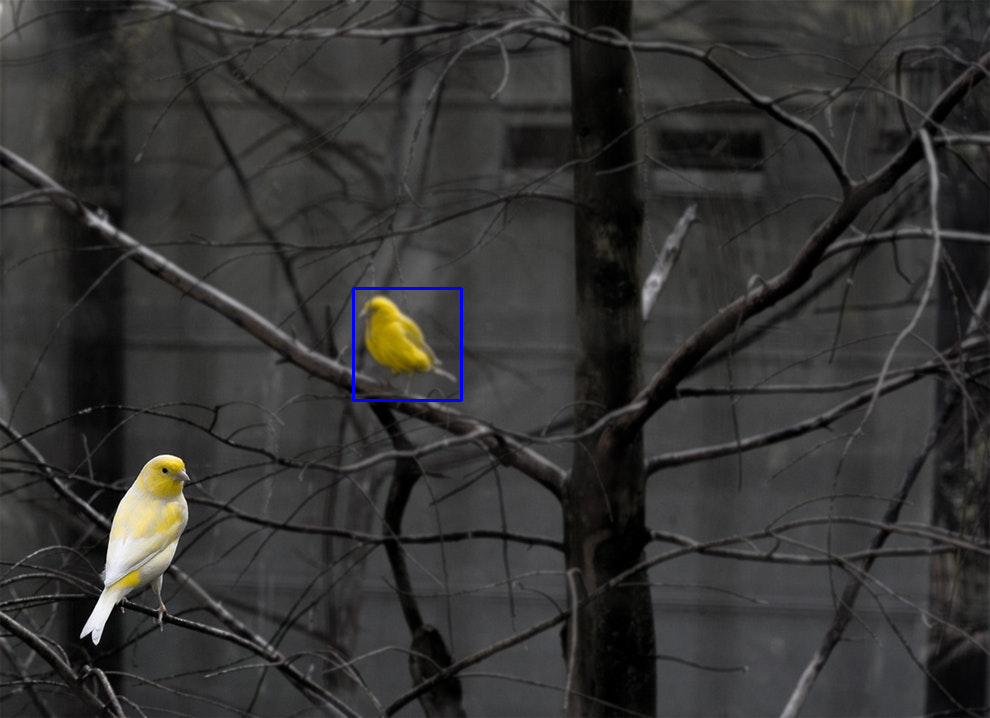

In [ ]:
from google.colab.patches import cv2_imshow
indices = np.where(norm_cross_corr1 == norm_cross_corr1.max())
start_point = (indices[1][0]-int(np.round(template.shape[1]/2)), indices[0][0]-int(np.round(template.shape[0]/2)))
end_point = (indices[1][0]+int(np.round(template.shape[1]/2)), indices[0][0]+int(np.round(template.shape[0]/2)))
img = cv2.imread('/content/birds1.jpeg')
img = cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)
cv2_imshow(img)

<function matplotlib.pyplot.show(close=None, block=None)>

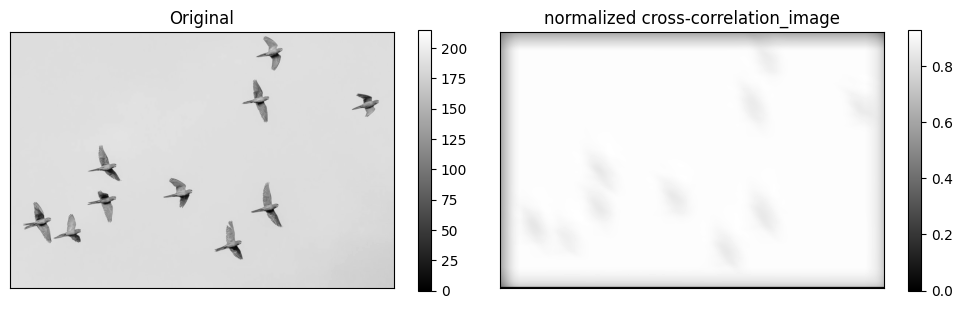

In [ ]:
# Normalized Cross-Correlation Filter
birds2 = cv2.imread('/content/birds2.jpeg', cv2.IMREAD_GRAYSCALE)
birds2 = birds2.astype(np.float32)
normalized_birds2 = birds2 / 255.0
template = cv2.imread('/content/template.jpeg', cv2.IMREAD_GRAYSCALE)
template = template.astype(np.float32)
normalized_template = template / 255.0
# norm_template = template*(1/np.sum(template))
correlation_birds2 = cv2.filter2D(normalized_birds2,-1,normalized_template)
norm_cross_corr2 = np.zeros_like(correlation_birds2)
template_height, template_width = normalized_template.shape
pad = int(np.round(template_height/2))-2
# Pad the birds1 image on both sides
padded_norm_birds2 = np.pad(normalized_birds2, ((pad, pad), (pad, pad)), mode='constant')
# padded_norm_birds1 = np.pad(normalized_birds1, ((0, template_height - 1), (0, template_width - 1)), mode='constant')
for i in range(padded_norm_birds2.shape[0] - template_height + 1):
    for j in range(padded_norm_birds2.shape[1] - template_width + 1):
        window = padded_norm_birds2[i:i+template_height, j:j+template_width]
        N = np.sum(window * normalized_template)
        D = np.sqrt(np.sum(window**2) * np.sum(normalized_template**2))
        norm_cross_corr2[i, j] = N/D

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(birds2, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.subplot(122), plt.imshow(norm_cross_corr2, cmap='gray'), plt.title('normalized cross-correlation_image')
plt.xticks([]), plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show


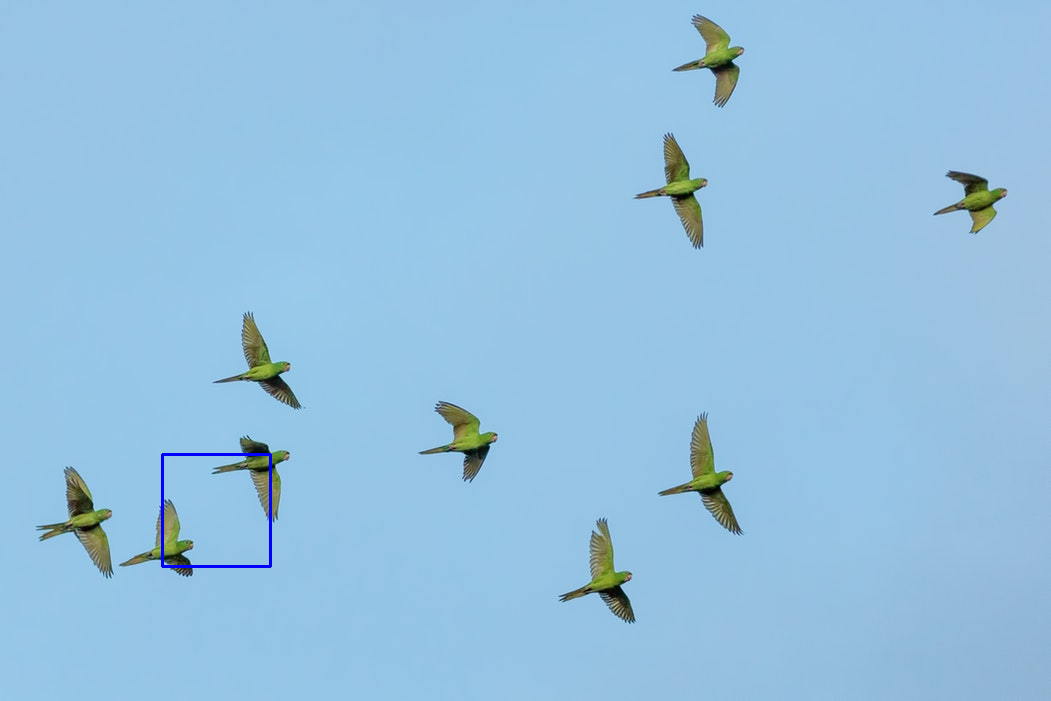

In [ ]:
from google.colab.patches import cv2_imshow
indices = np.where(norm_cross_corr2 == norm_cross_corr2.max())
start_point = (indices[1][0]-int(np.round(template.shape[1]/2)), indices[0][0]-int(np.round(template.shape[0]/2)))
end_point = (indices[1][0]+int(np.round(template.shape[1]/2)), indices[0][0]+int(np.round(template.shape[0]/2)))
img = cv2.imread('/content/birds2.jpeg')
img = cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)
cv2_imshow(img)

You're not correctly computing the NCC because it doesn't match the formula given in the Nov 16 lecture.

Yes, I think you got wrong for the equation.

Try to use this:
TM_CCORR_NORMED
cv.TM_CCORR_NORMED
R(x,y) =

<function matplotlib.pyplot.show(close=None, block=None)>

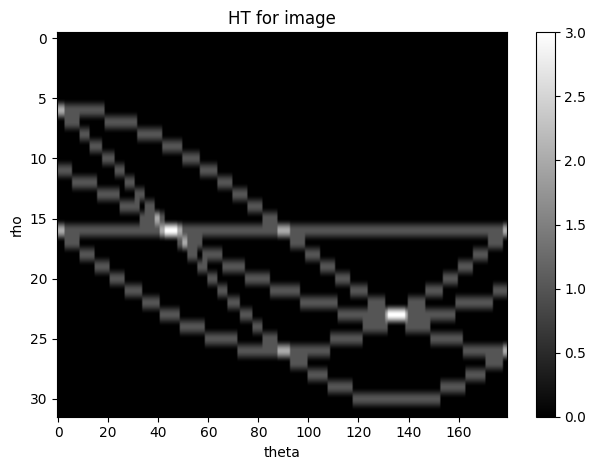

In [4]:
# Problem 3. Hough Transform
import cv2
import numpy as np
from matplotlib import pyplot as plt
len = 11
sample = np.full((len, len, 1), 0, dtype=np.uint8)
sample[0,0] = sample[len-1,0] = sample[0,len-1] = sample[len-1,len-1] = sample[round((len-1)/2),round((len-1)/2)] = 1
# plt.imshow(sample, cmap='gray')
n = 180
m = 2*round(np.sqrt(2)*len)
A = np.full((m, n, 1), 0, dtype=np.uint8)
for i in range(sample.shape[0]):
  for j in range(sample.shape[1]):
    if sample[i,j]==1:
      # print(i,j)
      for a in range(A.shape[1]):
        angle = a - 90
        rho = round(i*np.cos(angle*np.pi/180)+j*np.sin(angle*np.pi/180)) + round(m/2)
        A[rho,a] +=1
plt.imshow(A, cmap='gray', aspect='auto')
# plt.figure(figsize=(10, 3))
plt.title('HT for image')
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('rho')
plt.tight_layout()
plt.show

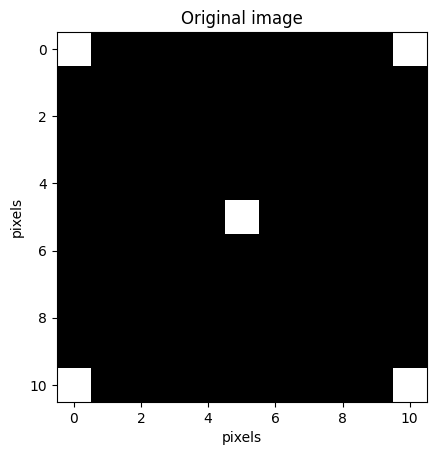

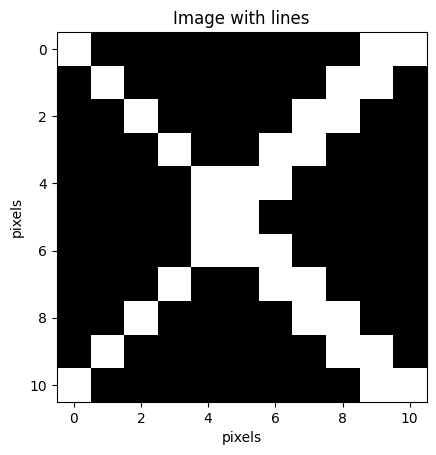

In [5]:
# Threshold the accumulator and draw lines
threshold = 2
plt.imshow(sample.squeeze(), cmap='gray')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title('Original image')
plt.show()
sample_with_lines = sample.copy()
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    if A[i, j] > threshold:
      rho = i - round(m / 2)
      angle = j - 90
      if angle != 0:
        x1 = 0
        y1 = round((rho - x1 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
        x2 = sample_with_lines.shape[0] - 1
        y2 = round((rho - x2 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
      else:
        x1 = rho
        y1 = 0
        x2 = rho
        y2 = sample_with_lines.shape[1]
      cv2.line(sample_with_lines, (y1, x1), (y2, x2), 1, 1)

plt.imshow(sample_with_lines.squeeze(), cmap='gray')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title('Image with lines')
plt.show()

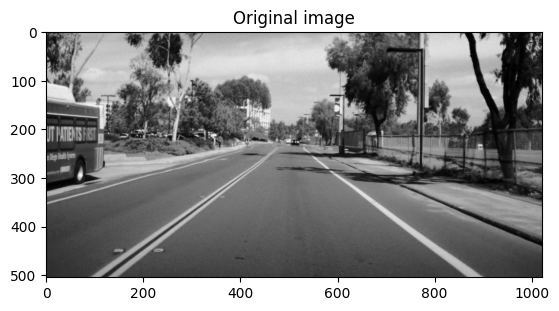

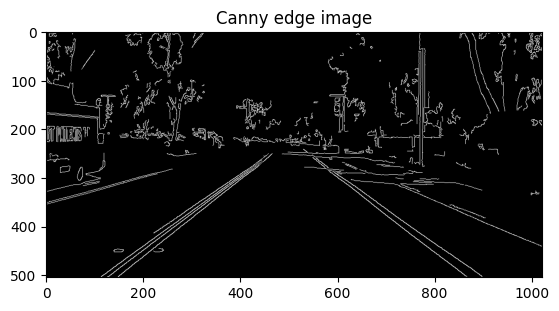

In [7]:
lane = cv2.imread('/content/lane.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lane, cmap='gray')
plt.title('Original image')
plt.show()
# Apply Canny edge detection
edges = cv2.Canny(lane, 200, 400)
edges[edges > 0] = 1
plt.imshow(edges, cmap='gray')
plt.title('Canny edge image')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

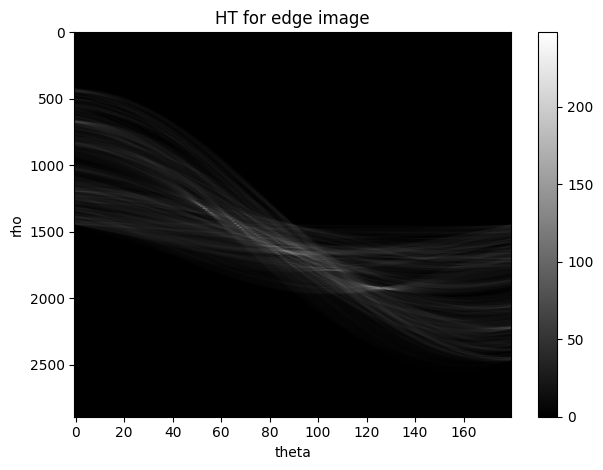

In [ ]:
# Problem 3. Hough Transform
length = max(edges.shape)
n = 180
m = 2*round(np.sqrt(2)*length)
A = np.full((m, n, 1), 0, dtype=np.uint8)
for i in range(edges.shape[0]):
  for j in range(edges.shape[1]):
    if edges[i,j]==1:
      # print(i,j)
      for a in range(A.shape[1]):
        angle = a - 90
        rho = round(i*np.cos(angle*np.pi/180)+j*np.sin(angle*np.pi/180)) + round(m/2)
        A[rho,a] +=1
plt.imshow(A, cmap='gray', aspect='auto')
plt.colorbar()
plt.xlabel('theta')
plt.ylabel('rho')
plt.title('HT for edge image')
plt.tight_layout()
plt.show

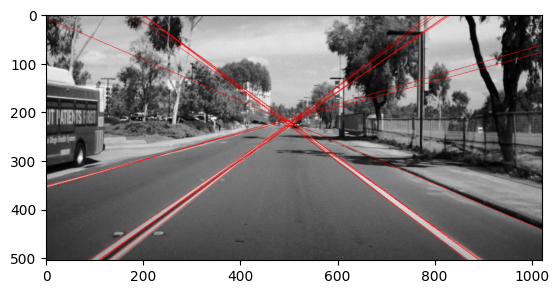

In [ ]:
# Threshold the accumulator and draw lines
threshold = round(0.75*np.max(A))
lane = cv2.imread('/content/lane.png')
sample_with_lines = lane.copy()
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    if A[i, j] > threshold:
      rho = i - round(m / 2)
      angle = j - 90
      if angle != 0:
        x1 = 0
        y1 = round((rho - x1 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
        x2 = sample_with_lines.shape[0] - 1
        y2 = round((rho - x2 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
      else:
        x1 = rho
        y1 = 0
        x2 = rho
        y2 = sample_with_lines.shape[1]
      cv2.line(sample_with_lines, (y1, x1), (y2, x2), (255,0,0), 1)

# Display the sample image with detected colored lines
plt.imshow(sample_with_lines.squeeze(), cmap='gray')
plt.show()

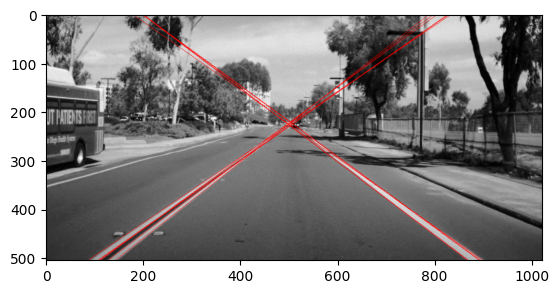

In [ ]:
# Threshold the accumulator and draw lines
threshold = round(0.75*np.max(A))
sample_with_lines = lane.copy()
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    if A[i, j] > threshold:
      rho = i - round(m / 2)
      angle = j - 90
      if angle != 0:
        if angle >30 or angle < -30:
          x1 = 0
          y1 = round((rho - x1 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
          x2 = sample_with_lines.shape[0] - 1
          y2 = round((rho - x2 * np.cos(angle * np.pi / 180)) / np.sin(angle * np.pi / 180))
      else:
        x1 = rho
        y1 = 0
        x2 = rho
        y2 = sample_with_lines.shape[1]
      cv2.line(sample_with_lines, (y1, x1), (y2, x2), (255,0,0), 1)

# Display the sample image with detected colored lines
plt.imshow(sample_with_lines.squeeze(), cmap='gray')
plt.show()

In [10]:
# Problem 4. KMean clustering
import cv2
import numpy as np

def createDataset(im):
  features = im.reshape(-1, 3)
  return features

def kMeansCluster(features, centers, max_iterations=100):
  N = features.shape[0]
  nclusters = centers.shape[0]
  idx = np.zeros(N, dtype=int)
  prev_centers = np.zeros_like(centers)
  max_iterations=25
  for iteration in range(max_iterations):
    print(iteration)
    for i in range(N):
      distances = np.linalg.norm(features[i] - centers, axis=1)
      idx[i] = np.argmin(distances)
    for j in range(nclusters):
      cluster_points = features[idx == j]
      if len(cluster_points) > 0:
        centers[j] = np.mean(cluster_points, axis=0)
    print(np.sum((centers - prev_centers)**2))
    if np.sum((centers - prev_centers)**2) <= 5 or np.all(centers == prev_centers):
    # if np.all(centers == prev_centers):
      break
    prev_centers = np.copy(centers)
  return idx, centers

def mapValues(im, idx, centers):
  idx_reshaped = idx.reshape(im.shape[:2])
  im_seg = np.zeros_like(im)
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      im_seg[i, j] = centers[idx_reshaped[i, j]]
  return im_seg

image = cv2.imread('/content/white-tower.png')
features = createDataset(image)
nclusters = 7
centers_ini = np.random.rand(nclusters, 3) * 255
idx, centers = kMeansCluster(features, centers_ini)
im_seg = mapValues(image, idx, centers)

0
435407.0033472204
1
4498.726410668802
2
806.6663306509228
3
7474.286561320208
4
947.6299246436168
5
202.6146042912603
6
78.01219158327633
7
25.199695279777735
8
7.026942340638125
9
3.1333569375994954


[[165.53547064 153.09132206 139.31508454]
 [153.19955739 126.46048688 103.02488164]
 [132.52404063 160.50921869 190.75920723]
 [ 25.84592895  34.49397696  38.23449178]
 [110.25293041  99.35961843  72.36140511]
 [210.67041199 158.23970037  89.78651685]
 [ 62.35918561  83.04205589  94.2018001 ]]


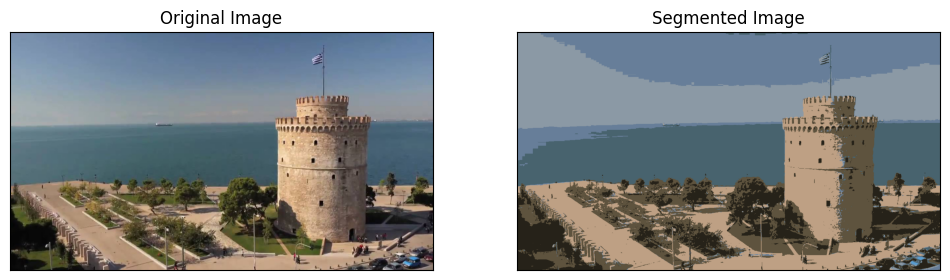

In [11]:
print(centers)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im_seg_rgb = cv2.cvtColor(im_seg, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(im_seg_rgb), plt.title('Segmented Image')
plt.xticks([]), plt.yticks([])
plt.show()


References

1. https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
